# Topics to be discussed:

1. Linear Regression
2. Logistic Regression
3. Decision Tree (Regression + Classification)
4. Random Forest (Regression + Classification)
5. Support Vector Machines (With and W/O kernel)
6. K-nearest neighbors
7. Neural Network architecture (Regression + Classification)

In [ ]:
# IMPORTING LIBRARIES

# scikit-learn packages 
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_circles, make_regression, make_blobs, make_moons
from sklearn.datasets import  load_diabetes, load_breast_cancer, load_iris, load_boston

# other packages
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Utility Functions
def plot_decision_boundary(features, label, classifier):
  """Function to plot decision boundary"""
  colors  = ["red", "green", "blue", "cyan", "yellow"]
  markers = ["4", "o", "s", "x", "*"]
  colormap = ListedColormap([colors[e] for e in np.unique(label)])

  x1_min, x1_max = features[:, 0].min()-1, features[:, 0].max()+1
  x2_min, x2_max = features[:, 1].min()-1, features[:, 1].max()+1

  x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

  
  Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
  Z = Z.reshape(x1.shape)
  plt.contourf(x1, x2, Z, cmap=colormap, alpha=0.4)
  plt.xlim(x1.min(), x1.max())
  plt.ylim(x2.min(), x2.max())

  for idx, cls in enumerate(np.unique(label)):
    plt.scatter(features[label==cls, 0], features[label==cls, 1], c=colors[idx], 
                label=f"Class {cls+1}", edgecolor="black", marker=markers[idx])

  plt.legend()
  plt.show()

def print_accuracy(classifier, valid_features, valid_label):
  print(f"Validation Accuracy: {round(classifier.score(valid_features, valid_label),2)*100}%")

def print_regression_accuracy(classifier, valid_features, valid_labels, threshold=0.3):
  y_pred = classifier.predict(valid_features)
  score = np.mean(abs(y_pred-valid_labels)<=threshold)
  print(f"Validation Accuracy: {round(score, 2)*100}%")

def scatter_datapoints(features, labels):
  """Function to plotting the input dataset"""
  colors  = ["red", "green", "blue", "cyan", "yellow"]
  markers = ["4", "o", "s", "x", "*"]
  np.random.shuffle(colors)
  np.random.shuffle(markers)

  for idx, i in enumerate(np.unique(labels)):
    plt.scatter(features[labels==i, 0], features[labels==i, 1], 
                c=colors[idx], label=f"Class {i}",
                marker=markers[idx], edgecolors="black")
  plt.legend()
  plt.xlabel("Feature #1", fontdict={"fontsize": 18})
  plt.ylabel("Feature #2", fontdict={"fontsize": 18})
  plt.show()

def normalize(features, strategy="standard"):
  """Function to normalize input data on the basis of
  some given strategy.
  """
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(features)
  return scaled_data

## 1. **Linear Regression:** 
In this algorithm we try to plot a line in the vector space such that the perpendicular distance of the data points (offset) from this line would be minimum.


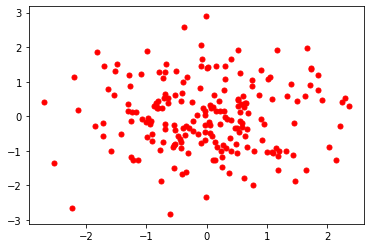

In [ ]:
# We will use regression dataset for linear regression
X, y = make_regression(n_samples=200, n_features=2, shuffle=True)

# EDA - Data Normalization
X_std = normalize(X) 

# There are 200 samples in the dataset.
# Let's visualize the samples
plt.scatter(X_std[:, 0], X_std[:, 1], c="red", s=25)
plt.show()

In [ ]:
# divide dataset into train and validation samples
x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, shuffle=True)

# Instantiate the model.
lr_regression = LinearRegression()

# Fitting the model
lr_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print_accuracy(lr_regression, x_test, y_test)

Validation Accuracy: 100.0%


## 2. Logistic Regression:
 
Although it looks from the name that it is a regression algorithm but that's not the case. It is a classification algorithm which uses **sigmoid** activation function. 

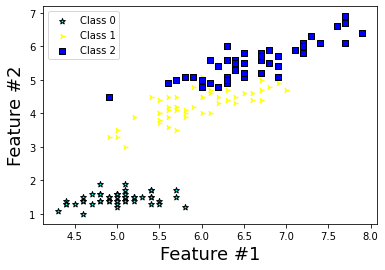

In [ ]:
# Loading the iris dataset
X_iris, y_iris = load_iris(return_X_y=True)

# Taking only two features for plotting decision boundaries.
X_iris = X_iris[:, [0, 2]]

# Plotting data
scatter_datapoints(X_iris, y_iris)

In [ ]:
# Instantiating the model
logistic_reg = LogisticRegression()

# EDA - Data Normalization
X_std = normalize(X_iris)

# Splitting the dataset
x_train, x_valid, y_train, y_valid = train_test_split(X_std, y_iris, stratify=y_iris,
                                                      test_size=0.2, random_state=48)

# Fitting the model
logistic_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

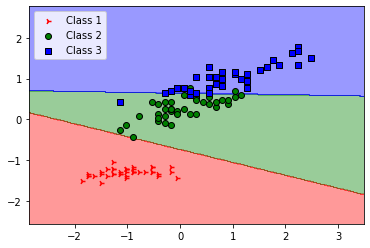

In [ ]:
plot_decision_boundary(x_train, y_train, classifier=logistic_reg)

In [ ]:
# Let's check out the score of our model
print_accuracy(logistic_reg, x_valid, y_valid)

Validation Accuracy: 93.0%


## 3. Decision Tree - Classification

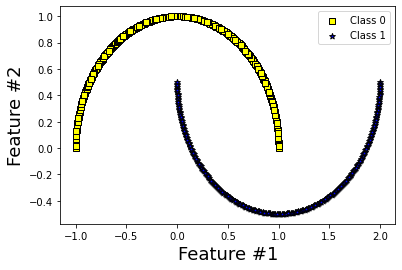

In [ ]:
# We will use the make moons dataset 
# (A non-linearly separable dataset)
X_moon, y_moon = make_moons(n_samples=500)

# Plotting data
scatter_datapoints(X_moon, y_moon)

In [ ]:
# How many samples corresponding to each class are present?
np.bincount(y_moon)

array([250, 250])

- Although we can use Principal Component Analysis 
to project this non-linearly seperable data onto a linearly seperable subspace,
we would use this data as it is for our decision tree task.

In [ ]:
# Instantiating the model
d_tree = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=48)

# Splitting  the dataset
x_train, x_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size=0.2,
                                                    stratify=y_moon, random_state=48)

# Fitting the model
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='best')

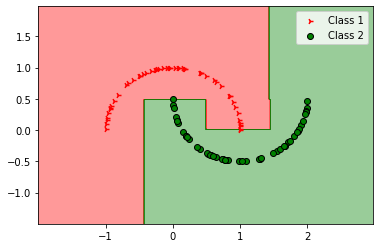

In [ ]:
# Let's plot the decision boundary
plot_decision_boundary(x_test, y_test, classifier=d_tree)

In [ ]:
# It can be seen that model has slightly large variance :) Let's look at the score.
print_accuracy(d_tree, x_test, y_test)

Validation Accuracy: 98.0%


## 3. Decision Tree - Regression

In [ ]:
# Loading the Boston dataset
X_boston, y_boston = load_boston(return_X_y=True)

One thing to note that DecisionTreeRegressor does not include impurity such as entropy, gini or classification error. It uses MSE to split the data.


In [ ]:
# Instantiating the model
d_tree_reg = DecisionTreeRegressor(criterion="mse", max_depth=10, random_state=48)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2,
                                                    random_state=48)

# Fitting the model
d_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=48, splitter='best')

In [ ]:
# Let's look at the validation score
print_accuracy(d_tree_reg, x_test, y_test)

Validation Accuracy: 77.0%


Printing the plot...


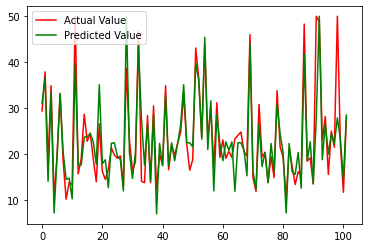

In [ ]:
# Let's plot the predicted value Vs. the actual values
y_pred = d_tree_reg.predict(x_test)

print("Printing the plot...")
plt.plot(y_test, c="red", label="Actual Value")
plt.plot(y_pred, c="green", label="Predicted Value")
plt.legend()
plt.show()

## 4. RandomForest - Classification

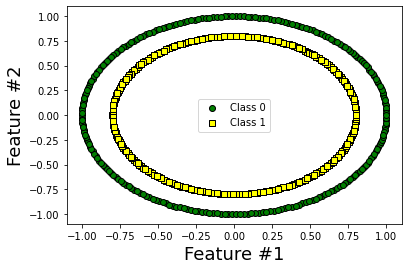

In [ ]:
# Let's load circles dataset
X_circle, y_circle = make_circles(n_samples=500, shuffle=True, random_state=48)

# Plotting the data
scatter_datapoints(X_circle, y_circle)

Again, this dataset is also non-linearly seperable and requires either non-linear algorithm or projection to high dimensional space.


In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=200, criterion="gini",
                                                  max_depth=50, n_jobs=-1)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_circle, y_circle, test_size=0.2,
                                                    stratify=y_circle, random_state=48)

# Fit the model
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

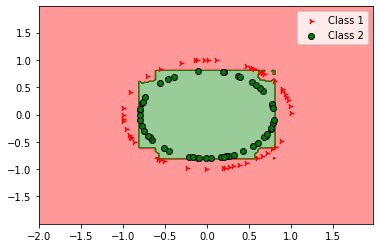

In [ ]:
# Plot decision region
plot_decision_boundary(x_test, y_test, classifier=random_forest_classifier)

In [ ]:
# Let's look at the model's score
print_accuracy(random_forest_classifier, x_test, y_test)

Validation Accuracy: 98.0%


This model is has also slightly large variance but having a good validation score.

## 4. RandomForest- Regression

In [ ]:
# Using the diabetes regression dataset.
X_diab, y_diab = load_diabetes(return_X_y=True)

In [ ]:
# Instantiate the model
random_reg = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=48,
                                   n_jobs=-1)

# Splitting the dataset
x_train, x_test, y_train, y_test  = train_test_split(X_diab, y_diab, test_size=0.2,
                                                     random_state=48)

# Fit the model
random_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=48, verbose=0, warm_start=False)

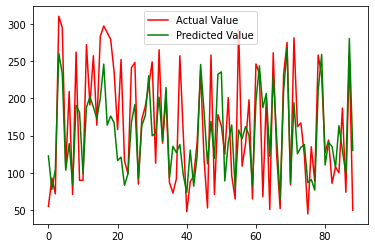

In [ ]:
# Let's visualize the predictions
y_pred = random_reg.predict(x_test)

plt.plot(y_test, c="red", label="Actual Value")
plt.plot(y_pred, c='green', label="Predicted Value")
plt.legend()
plt.show()

In [ ]:
# Let's look at the model's score
print_accuracy(random_reg, x_test, y_test)

Validation Accuracy: 52.0%


- Hyperparameter tuning and other techniques could be implemented for the above model to improve its performance.

## 5. Support Vector Machines (with linear kernel)

- Support Vector Machines (or svm) are a class of machine learning classifiers that works pretty well for linearly as well as non-linearly seperable data.

- It works with main aim to maximize the margin. A margin is the distance of the decision boundary to the closest training samples which are also called as **support vectors**.

- For linearly seperable data we use "linear kernel" and for non-linearly seperable data, we use "gaussion kernel" or "Radial Basis Function".

In [ ]:
# Let's load the famous breast cancer dataset where labels
# are benign (0) and malignant (1).
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

Let's use data compression for this task. We would train our model for both compressed and uncompressed data and see the effect of performance change.

In [ ]:
# Compress the dataset
kpca = KernelPCA(n_components=2, kernel="linear", n_jobs=-1)
X_compress = kpca.fit_transform(X_cancer)
print(f"Original shape: {X_cancer.shape} \nCompressed shape: {X_compress.shape}")

Original shape: (569, 30) 
Compressed shape: (569, 2)


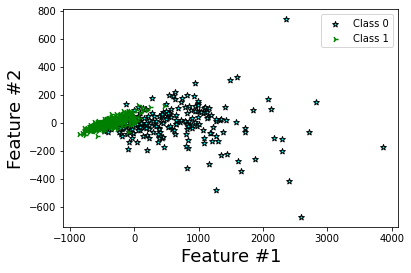

In [ ]:
# Let's visualize the compressed dataset
scatter_datapoints(X_compress, y_cancer)

As we can see that data is linearly inseperable and hence we need to use kernel trick to make this data linearly seperable. But before that let's just finish our experiment of training the classifier (Linear SVM).

In [ ]:
# Instantiate the model
svm_classifier = SVC(kernel="linear")
svm_classifier_cm = SVC(kernel="linear") 

# EDA - Data Normalization
X_compress_std = normalize(X_compress)
X_cancer_std = normalize(X_cancer)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_cancer_std, y_cancer, random_state=48,
                                                    stratify=y_cancer)

x_train_cm, x_test_cm, y_train_cm, y_test_cm = train_test_split(X_compress_std, y_cancer,
                                                                random_state=48, stratify=y_cancer)

# Fitting the models
svm_classifier.fit(x_train, y_train)
svm_classifier_cm.fit(x_train_cm, y_train_cm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

There is a difference of nearly 0.05 in the performance of the models which can be reduced further with good 
hyperparameter choice or just ignored for the cases where storage of data is main issue rather than performance.

Remember we can only plot decision surface for data upto 2 features on a 2D plot and 3 features on a 3D plot. Since we are plotting in two dimensions, we must use **X_compress** and **svm_classifier_cm** as the input data and classifier respectively.


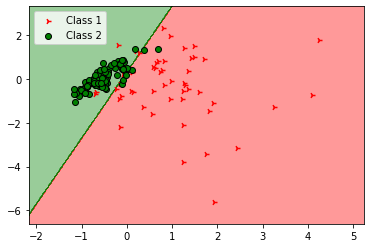

In [ ]:
# Plotting decision boundary
plot_decision_boundary(x_test_cm, y_test_cm, classifier=svm_classifier_cm)

In [ ]:
# Let's have a look at model's performance
print("With Compression-", end=" "); print_accuracy(svm_classifier_cm, x_test_cm, y_test_cm)
print("Without Compression-", end=" "); print_accuracy(svm_classifier, x_test, y_test)

With Compression- Validation Accuracy: 92.0%
Without Compression- Validation Accuracy: 97.0%


Having used linear kernel let's now use radial basis function in our SVC classifier.

## 5. Support Vector Machines (with Gaussian kernel)

In [ ]:
# Instantiating the model
svm_classifier_rbf = SVC(kernel="rbf", C=0.9)
svm_classifier_cm_rbf = SVC(kernel="rbf", C=0.9)

# Fitting the model (Using the earlier created dataset)
svm_classifier_rbf.fit(x_train, y_train)
svm_classifier_cm_rbf.fit(x_train_cm, y_train_cm)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

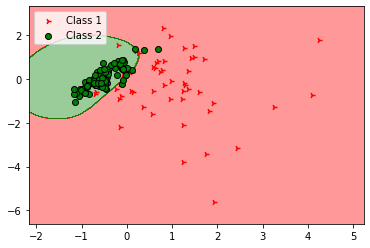

In [ ]:
# Plotting decision boundary
plot_decision_boundary(x_test_cm, y_test_cm, classifier=svm_classifier_cm_rbf)

In [ ]:
# Let's have a look at model's performance
print("With Compression-", end=" "); print_accuracy(svm_classifier_cm_rbf, x_test_cm, y_test_cm)
print("Without Compression-", end=" "); print_accuracy(svm_classifier_rbf, x_test, y_test)

With Compression- Validation Accuracy: 93.0%
Without Compression- Validation Accuracy: 97.0%


Let's now look at a model build upon Unsupervised learning algorithm K-means Clustering.

## 6. K-Means Clustering

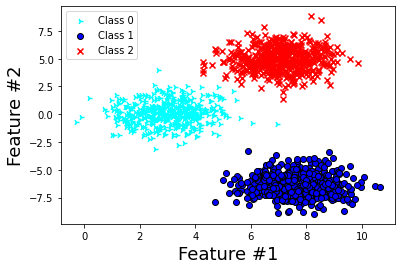

In [ ]:
# Loading the blobs dataset
X_blobs, y_blobs = make_blobs(n_samples=1500, centers=3, random_state=18)

# Plotting the data
scatter_datapoints(X_blobs, y_blobs)

- We need to make a model that learns the cluster information for the given data.


In [ ]:
# Instantiating the model
km = KMeans(n_clusters=3, max_iter=900, random_state=18)

# EDA - Data Normalization
X_std = normalize(X_blobs)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_std, y_blobs, test_size=0.2,
                                                    stratify=y_blobs, random_state=18)

# Fitting the model
km.fit(x_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=900,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=18, tol=0.0001, verbose=0)

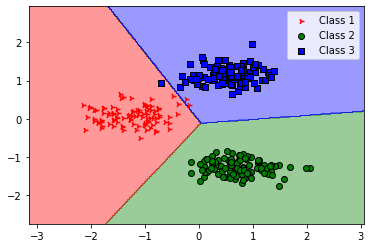

In [ ]:
# Plotting decision boundary
plot_decision_boundary(x_test, y_test, classifier=km)

- Hypothesis: We cannot use classifier.score function for this model as this function return the *r2_score* of the model which takes into consideration actual labels for the features and not the cluster information.

In [ ]:
# Let's have a look at the model's accuracy.
print_regression_accuracy(km, x_test, y_test)

Validation Accuracy: 99.0%


- The one disadvantage of this method is that we need to know the number of clusters formed prior to fitting of the model. We got labels in this case but usually unsupervised learning tasks does not deal with labels. We could also fit the model without specifying the labels as given below.

In [ ]:
# Instantiating the model
km_unsup = KMeans(n_clusters=3, random_state=18, max_iter=900)

# Fitting the model
km_unsup.fit(x_train)

# Evaluating the model
print_regression_accuracy(km_unsup, x_test, y_test)

Validation Accuracy: 99.0%


- The same performance as above. Hence we can say that n_clusters is a hyperparameter to tune.

## 7. Neural Networks - Regression

- Now we are at the last and at base of the mordern machine learning algorithms - The Neural Networks.

In [ ]:
# Let's load the boston dataset
X_boston, y_boston = load_boston(return_X_y=True)

# EDA - Data Normalization
X_std = normalize(X_boston)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_std, y_boston, test_size=0.2,
                                                    random_state=48)

- Now the implementation of neural networks are commonly done using some backend frameworks such as Caffee, Theano, Tensorflow or Pytorch.

- We would be going to implement our model on Tensorflow framework.

- Although we can pass samples directly into the model, there is a fine way of building dataset using the **tf.data** pipeline. The way tensorflow loves it.

In [ ]:
# Configrations

EPOCHS = 100
AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE=32
IMG_SIZE=224
BUFFER= 900
SPLIT_WEIGHTS=(8, 1, 1)
SPLIT = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(32, input_dim=13, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="linear")
                                    ])
# Compiling the model
model.compile(loss="mean_squared_logarithmic_error", optimizer="sgd")

- Note that the above model does not have a single hypothesis function, its a combination of multiple and hence the model will learn non-linear mappings.

In [ ]:
# Printing model info
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 5.8265 - val_loss: 4.3061
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 3.7154 - val_loss: 3.2163
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 2.8718 - val_loss: 2.6023
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 2.3559 - val_loss: 2.1885
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 1.9962 - val_loss: 1.8843
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 1.7272 - val_loss: 1.6494
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 1.5174 - val_loss: 1.4627
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 1.3488 - val_loss: 1.3093
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2100 - val_loss: 1.1816
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 1.0943 - val_loss: 1.0738
Epoch 11/

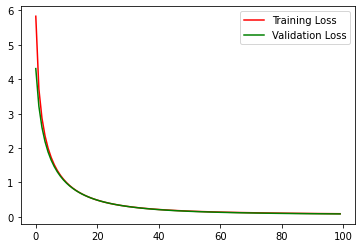

In [ ]:
# Plotting the model's performance
history_dict = model.history.history

plt.plot(history_dict["loss"], label="Training Loss", c="red")
plt.plot(history_dict["val_loss"], label="Validation Loss", c="green")
plt.legend()
plt.show()

As we can see model is very much successful in learning from the data. Let's now see its score.

In [ ]:
y_pred = model.predict(x_test)
print(f"Accuracy of model: {np.mean(y_pred==y_test)}%")

# Oops! 0 accuracy?

# As we know that in regression task, we cannot get exact value
# as an output and hence we need to define an acceptable range 
# of difference b/w actual value and predicted value when getting
# the accuracy of the model.

#Let's define a threshold over which prediction would be considered correct.
threshold = 0.3

print(f"Accuracy after introducing threshold: {round(np.mean((y_pred-y_test)<threshold)*100, 2)}%")

Accuracy of model: 0.0%
Accuracy after introducing threshold: 60.39%


The more large the value of this "threshold" variable would be, the more good accuracy we would get.

The above model could me greately improved by introducing more layers, more data, good weight initialization techniques, hyperparameter optimization techniques etc.

## 7. Neural Networks - Classification

Let us now finally look at the classification side of the neural networks.

In [ ]:
# let's load the abstract reasoning task from tensorflow datasets.
(train, val, test), data_info = tfds.load(name="tf_flowers", split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                          with_info=True, as_supervised=True)

In [ ]:
data_info

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.0,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

In [ ]:
# Prepare dataset
def prepare_image(image, IMG_SIZE=224, augment=False):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  image = tf.cast(image, tf.float32)/ 255.0
  if augment:
    image = tf.image.random_brightness(image, 0.02)
    image = tf.image.random_flip_up_down(image)
  return image

def prepare_dataset(data, batch_size=8, repeat=False, shuffle=False, augment=False):
  dataset = data.map(lambda image, label: (prepare_image(image, IMG_SIZE=IMG_SIZE,
                                                         augment=augment), label))
  
  if repeat:
    dataset = dataset.repeat(6)
  
  if shuffle:
    dataset = dataset.shuffle(batch_size*BUFFER)

  dataset = dataset.batch(batch_size)
  dataset.prefetch(AUTO)

  return dataset

In [ ]:
# As we have seen that this dataset has five distinct class labels and hence we will use softmax as an
# activation function in the last layer 

In [ ]:
# Building the model
# We would use Convolutional layers in this models as the input to the model
# are images.
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu",
                                                           padding="same",input_shape=(224, 224, 3)),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    
                                    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu",
                                                           padding="same"),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dense(5, activation="softmax")
])

# Loss: sparse_categorical_crossentropy because we have numerical labels and not one 
# hot encoded otherwise we could've used categorical crossentropy loss. 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               25690240  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [ ]:
model.fit(prepare_dataset(train, batch_size=BATCH_SIZE, repeat=True, shuffle=True, augment=True), 
          epochs=5,
          steps_per_epoch=64,
          validation_data=prepare_dataset(val))

Epoch 1/5
64/64 [==============================] - 145s 2s/step - loss: 2.0482 - accuracy: 0.3867 - val_loss: 1.2846 - val_accuracy: 0.4305
Epoch 2/5
64/64 [==============================] - 148s 2s/step - loss: 1.1080 - accuracy: 0.5527 - val_loss: 1.0398 - val_accuracy: 0.6049
Epoch 3/5
64/64 [==============================] - 144s 2s/step - loss: 0.8862 - accuracy: 0.6646 - val_loss: 1.0671 - val_accuracy: 0.6158
Epoch 4/5
64/64 [==============================] - 146s 2s/step - loss: 0.8190 - accuracy: 0.7046 - val_loss: 1.0585 - val_accuracy: 0.6349
Epoch 5/5
64/64 [==============================] - 145s 2s/step - loss: 0.7109 - accuracy: 0.7354 - val_loss: 1.1766 - val_accuracy: 0.6213


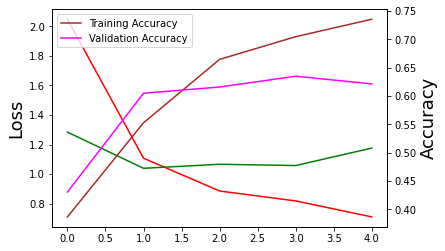

In [ ]:
history_dict = model.history.history

plt.plot(history_dict["loss"], label="Training Loss", c="red")
plt.plot(history_dict["val_loss"], label="Validation Loss", c="green")
plt.ylabel("Loss", fontdict={"fontsize":18})
plt.twinx()

plt.plot(history_dict["accuracy"], label="Training Accuracy", c="brown")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy", c="magenta")
plt.ylabel("Accuracy", fontdict={"fontsize":18})
plt.legend()
plt.show()


END OF THE NOTEBOOK